In [55]:
import pickle
import numpy as np
import tensorflow as tf

def augment_data(dataset, dataset_labels, augmentation_factor=1, use_random_rotation=0, 
                 use_random_shear=0, use_random_shift=0, use_random_zoom=0, 
                use_random_brightness=0, use_random_contrast=0, use_flip_left_right=0, 
                use_flip_up_down=0, use_random_hue=0, use_random_saturation=0):
    augmented_image = []
    augmented_image_labels = []

    for num in range (0, dataset.shape[0]):

        for i in range(0, augmentation_factor):
            # original image:
            augmented_image.append(dataset[num])
            augmented_image_labels.append(dataset_labels[num])

            if use_random_rotation:
                augmented_image.append(tf.contrib.keras.preprocessing.image.random_rotation(dataset[num], 20, row_axis=0, col_axis=1, channel_axis=2))
                augmented_image_labels.append(dataset_labels[num])

            if use_random_shear:
                augmented_image.append(tf.contrib.keras.preprocessing.image.random_shear(dataset[num], 0.2, row_axis=0, col_axis=1, channel_axis=2))
                augmented_image_labels.append(dataset_labels[num])

            if use_random_shift:
                augmented_image.append(tf.contrib.keras.preprocessing.image.random_shift(dataset[num], 0.2, 0.2, row_axis=0, col_axis=1, channel_axis=2))
                augmented_image_labels.append(dataset_labels[num])

            if use_random_zoom:
                augmented_image.append(tf.contrib.keras.preprocessing.image.random_zoom(dataset[num], (0.8, 1.2), row_axis=0, col_axis=1, channel_axis=2))
                augmented_image_labels.append(dataset_labels[num])
            with tf.Session() as sess:
                if use_random_brightness:
                    augmented_image.append(sess.run(tf.image.random_brightness(dataset[num], 0.2)))
                    augmented_image_labels.append(dataset_labels[num])

                if use_random_contrast:
                    augmented_image.append(sess.run(tf.image.random_contrast(dataset[num], 0.999, 1.001)))
                    augmented_image_labels.append(dataset_labels[num])

                if use_flip_left_right:
                    augmented_image.append(sess.run(tf.image.flip_left_right(dataset[num])))
                    augmented_image_labels.append(dataset_labels[num])

                if use_flip_up_down:
                    augmented_image.append(sess.run(tf.image.flip_up_down(dataset[num])))
                    augmented_image_labels.append(dataset_labels[num])

                if use_random_hue:
                    augmented_image.append(sess.run(tf.image.random_hue(dataset[num], 0.001)))
                    augmented_image_labels.append(dataset_labels[num])

                if use_random_saturation:
                    augmented_image.append(sess.run(tf.image.random_saturation(dataset[num], 0.995, 1.005)))
                    augmented_image_labels.append(dataset_labels[num])

    return np.array(augmented_image), np.array(augmented_image_labels)

6


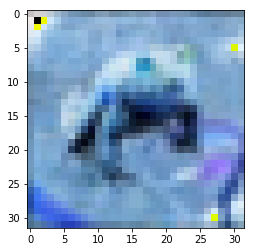

6


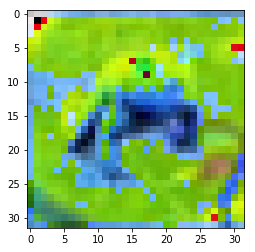

9


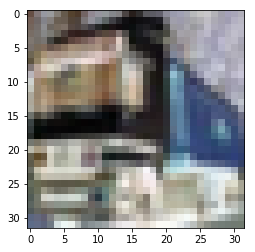

9


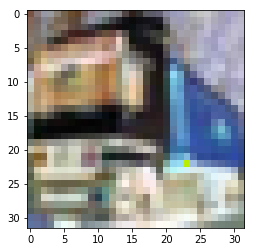

9


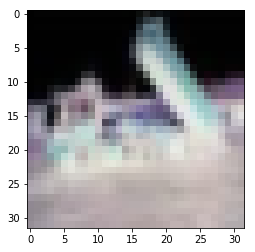

9


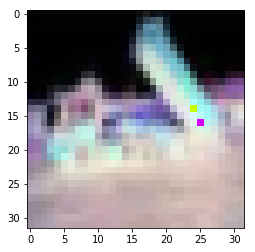

4


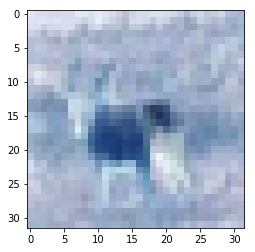

4


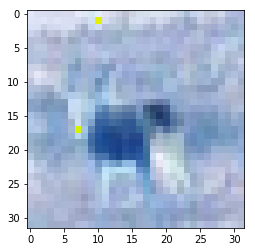

1


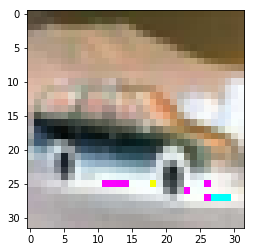

1


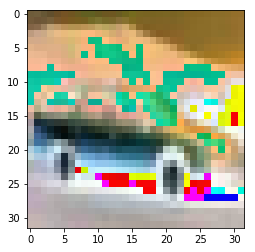

1


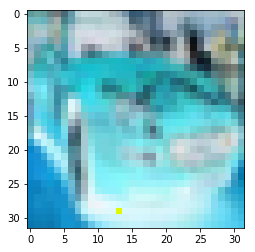

1


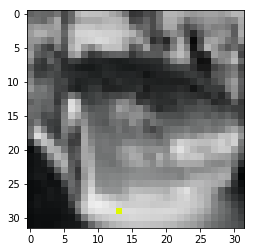

2


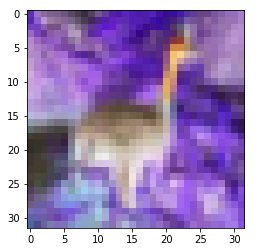

2


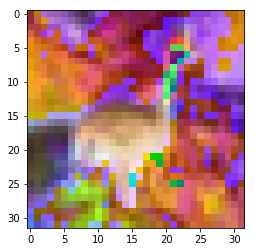

7


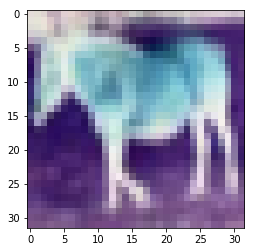

7


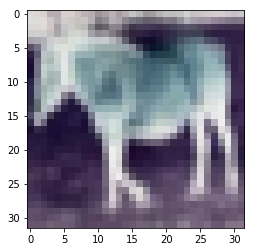

8


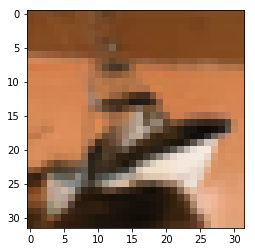

8


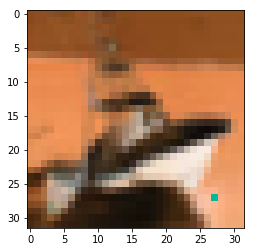

3


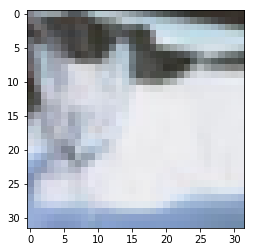

3


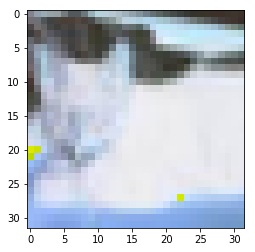

In [56]:
import pickle
with open('dataset/cifar10_data.pickle', 'rb') as handle:
    X_train, y_train, X_test, y_test = pickle.load(handle)

    
x, y = augment_data(X_train[:10], y_train[:10], use_random_saturation=1)

import numpy as np
import matplotlib.pyplot as plt
for i, j in zip(x, y):
    print(np.argmax(j))
    plt.imshow(i)
    plt.show()

In [22]:
x[1]

<tf.Tensor 'adjust_brightness/convert_image_1:0' shape=(32, 32, 3) dtype=float64>